In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\n.rennie\Documents\Project 4\Air_Quality_20240807.csv'
data = pd.read_csv(file_path)

# Basic EDA
print(data.head())  # Preview the first few rows
print(data.describe())  # Get basic statistics
print(data.info())  # Check for missing values and data types


   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     179785           640  Boiler Emissions- Total SO2 Emissions   
2     178540           365                Fine particles (PM 2.5)   
3     178561           365                Fine particles (PM 2.5)   
4     823217           365                Fine particles (PM 2.5)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1  Number per km2       number         UHF42        209.0   
2            Mean       mcg/m3         UHF42        209.0   
3            Mean       mcg/m3         UHF42        409.0   
4            Mean       mcg/m3         UHF42        409.0   

            Geo Place Name          Time Period  Start_Date  Data Value  \
0         Southeast Queens                 2015  01/01/2015         0.3   
1  Bensonhurst - Bay Ridge                 2015  01/01/2015         

In [10]:
!pip install folium


   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 435.7 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 980.4 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 892.5 kB/s eta 0:00:00


In [3]:
# Filter data for SO2 emissions
so2_data = data[data['Name'].str.contains('SO2', case=False, na=False)]

# Preview the filtered data
print(so2_data.head())


    Unique ID  Indicator ID                                   Name  \
0      179772           640  Boiler Emissions- Total SO2 Emissions   
1      179785           640  Boiler Emissions- Total SO2 Emissions   
16     130413           640  Boiler Emissions- Total SO2 Emissions   
17     130412           640  Boiler Emissions- Total SO2 Emissions   
18     130434           640  Boiler Emissions- Total SO2 Emissions   

           Measure Measure Info Geo Type Name  Geo Join ID  \
0   Number per km2       number         UHF42        409.0   
1   Number per km2       number         UHF42        209.0   
16  Number per km2       number         UHF42        210.0   
17  Number per km2       number         UHF42        209.0   
18  Number per km2       number         UHF42        410.0   

                   Geo Place Name Time Period  Start_Date  Data Value  Message  
0                Southeast Queens        2015  01/01/2015         0.3      NaN  
1         Bensonhurst - Bay Ridge        201

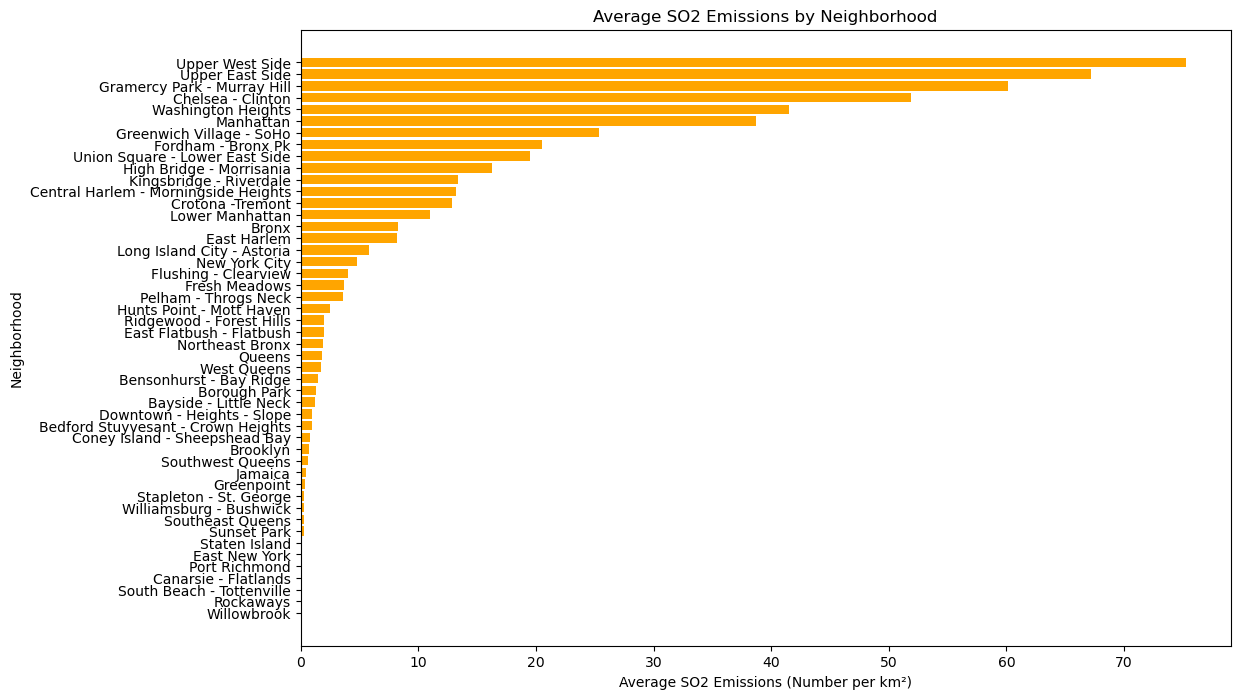

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `so2_data` is your filtered DataFrame for SO2 emissions

# Group data by neighborhood and calculate the mean SO2 emissions
so2_summary = so2_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()

# Sort by emissions to highlight neighborhoods with the highest emissions
so2_summary = so2_summary.sort_values('Data Value', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(so2_summary['Geo Place Name'], so2_summary['Data Value'], color='orange')
plt.xlabel('Average SO2 Emissions (Number per km²)')
plt.ylabel('Neighborhood')
plt.title('Average SO2 Emissions by Neighborhood')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest emissions at the top
plt.show()



## Analysis Question 1: •	Create a spatial distribution map of SO2 emissions from boiler emissions across neighborhoods

In [6]:
# Filter data for each pollutant
nox_data = data[data['Name'].str.contains('NOx', case=False, na=False)]
pm25_data = data[data['Name'].str.contains('PM 2.5', case=False, na=False)]

# Group and calculate the mean for each pollutant
nox_summary = nox_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()
pm25_summary = pm25_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()

# Merge the summaries
merged_summary = so2_summary.merge(nox_summary, on='Geo Place Name', suffixes=('_SO2', '_NOx'))
merged_summary = merged_summary.merge(pm25_summary, on='Geo Place Name')
merged_summary.rename(columns={'Data Value': 'Data Value_PM25'}, inplace=True)

# Identify neighborhoods with high emissions across all three pollutants
high_emission_neighborhoods = merged_summary[(merged_summary['Data Value_SO2'] > merged_summary['Data Value_SO2'].mean()) &
                                             (merged_summary['Data Value_NOx'] > merged_summary['Data Value_NOx'].mean()) &
                                             (merged_summary['Data Value_PM25'] > merged_summary['Data Value_PM25'].mean())]

# Display these neighborhoods
print(high_emission_neighborhoods)


                          Geo Place Name  Data Value_SO2  Data Value_NOx  \
0                        Upper West Side           75.30          229.20   
1                        Upper East Side           67.20          247.85   
2            Gramercy Park - Murray Hill           60.15          270.45   
3                      Chelsea - Clinton           51.90          193.15   
4                     Washington Heights           41.50          107.95   
5                              Manhattan           38.70          151.95   
6               Greenwich Village - SoHo           25.35          126.90   
8         Union Square - Lower East Side           19.50          121.80   
9               High Bridge - Morrisania           16.30           75.10   
11  Central Harlem - Morningside Heights           13.20           79.95   
12                      Crotona -Tremont           12.85           59.25   
13                       Lower Manhattan           11.00          116.80   

    Data Va

In [7]:
import pandas as pd

# Merge SO2, NOx, and PM 2.5 data to find neighborhoods with consistently high emissions
summary_table = merged_summary.copy()

# Sort by each column to find top neighborhoods
summary_table = summary_table.sort_values(by=['Data Value_SO2', 'Data Value_NOx', 'Data Value_PM25'], ascending=False)

# Display top neighborhoods
print(summary_table.head(10))


                   Geo Place Name  Data Value_SO2  Data Value_NOx  \
0                 Upper West Side           75.30          229.20   
1                 Upper East Side           67.20          247.85   
2     Gramercy Park - Murray Hill           60.15          270.45   
3               Chelsea - Clinton           51.90          193.15   
4              Washington Heights           41.50          107.95   
5                       Manhattan           38.70          151.95   
6        Greenwich Village - SoHo           25.35          126.90   
7              Fordham - Bronx Pk           20.55           68.00   
8  Union Square - Lower East Side           19.50          121.80   
9        High Bridge - Morrisania           16.30           75.10   

   Data Value_PM25  
0         9.830952  
1        10.357143  
2        12.104762  
3        11.766667  
4         9.435714  
5        10.366667  
6        10.811905  
7         9.119048  
8        10.228571  
9         9.635714  


In [13]:
# Redefine the coordinates dictionary
coordinates = {
    'Southeast Queens': (40.6761, -73.7562),
    'Bensonhurst - Bay Ridge': (40.6118, -74.0113),
    'Coney Island - Sheepshead Bay': (40.5763, -73.9754),
    'Rockaways': (40.5796, -73.8371),
    'Upper East Side': (40.7736, -73.9566),
    'East Harlem': (40.7957, -73.9389),
    'Fordham - Bronx Pk': (40.8600, -73.8986),
    'Chelsea - Clinton': (40.7465, -74.0014),
    'Downtown - Heights - Slope': (40.6711, -73.9634),
    'Central Harlem - Morningside Heights': (40.8116, -73.9465),
    'Northeast Bronx': (40.8822, -73.8380),
    'East Flatbush - Flatbush': (40.6529, -73.9313),
    'Brooklyn': (40.6782, -73.9442),
    'Bronx': (40.8448, -73.8648),
    'Greenwich Village - SoHo': (40.7282, -74.0048),
    'High Bridge - Morrisania': (40.8270, -73.9174),
    'Manhattan': (40.7831, -73.9712),
    'Lower Manhattan': (40.7074, -74.0113),
    'East New York': (40.6668, -73.8824),
    'Crotona -Tremont': (40.8468, -73.8895),
    'Sunset Park': (40.6455, -74.0124),
    'Williamsburg - Bushwick': (40.7003, -73.9410),
    'Fresh Meadows': (40.7336, -73.7800),
    'Union Square - Lower East Side': (40.7347, -73.9904),
    'Washington Heights': (40.8506, -73.9346),
    'Kingsbridge - Riverdale': (40.8830, -73.9055),
    'Bedford Stuyvesant - Crown Heights': (40.6741, -73.9458),
    'Flushing - Clearview': (40.7675, -73.8331),
    'Gramercy Park - Murray Hill': (40.7365, -73.9845),
    'Canarsie - Flatlands': (40.6407, -73.8982),
    'Southwest Queens': (40.7104, -73.9076),
    'Hunts Point - Mott Haven': (40.8097, -73.8860),
    'Upper West Side': (40.7870, -73.9754),
    'Borough Park': (40.6323, -73.9874),
    'Bayside - Little Neck': (40.7585, -73.7697),
    'Pelham - Throgs Neck': (40.8498, -73.8292),
    'Stapleton - St. George': (40.6437, -74.0736),
    'Greenpoint': (40.7245, -73.9419),
    'Port Richmond': (40.6352, -74.1352),
    'Ridgewood - Forest Hills': (40.7037, -73.8743),
    'Staten Island': (40.5795, -74.1502),
    'Queens': (40.7282, -73.7949),
    'West Queens': (40.7421, -73.9187),
    'South Beach - Tottenville': (40.5763, -74.1430),
    'Willowbrook': (40.6080, -74.1384),
    'Jamaica': (40.7027, -73.7880),
    'Long Island City - Astoria': (40.7590, -73.9235),
    'New York City': (40.7128, -74.0060)
}


In [14]:
# Check for neighborhood names in so2_data that do not match the coordinates dictionary
missing_neighborhoods = so2_data[~so2_data['Geo Place Name'].isin(coordinates.keys())]['Geo Place Name'].unique()
missing_neighborhoods


array([], dtype=object)

In [16]:
# Assign coordinates to the SO2 data using .loc to avoid the warning
so2_data.loc[:, 'Coordinates'] = so2_data['Geo Place Name'].map(coordinates)



In [17]:
from folium.plugins import HeatMap

# Prepare data for heatmap: latitude, longitude, and SO2 emission value
heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['Data Value']] for index, row in so2_data.iterrows()]


In [19]:
import folium
from folium.plugins import HeatMap


In [22]:
# Create the heatmap
m_heat = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
HeatMap(heat_data, radius=15, blur=25, max_zoom=1).add_to(m_heat)

# Display the heatmap in the notebook
m_heat


## Analysis Question 2: •	Identify neighborhoods with consistently high levels of boiler emissions (NOx, PM 2.5, SO2)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Load the dataset from the CSV file
file_path = 'C:/Users/n.rennie/Documents/Project 4/Air_Quality_20240807.csv'  # Update the path as needed
data = pd.read_csv(file_path)


In [7]:
# Filter data for each pollutant
nox_data = data[data['Name'].str.contains('NOx', case=False, na=False)]
pm25_data = data[data['Name'].str.contains('PM 2.5', case=False, na=False)]
so2_data = data[data['Name'].str.contains('SO2', case=False, na=False)]

# Aggregate emissions by neighborhood
nox_summary = nox_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()
pm25_summary = pm25_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()
so2_summary = so2_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()

# Merge all summaries into one DataFrame
emission_summary = nox_summary.merge(pm25_summary, on='Geo Place Name', suffixes=('_NOx', '_PM25'))
emission_summary = emission_summary.merge(so2_summary, on='Geo Place Name')
emission_summary.rename(columns={'Data Value': 'SO2_Emissions'}, inplace=True)

# Normalize the emissions data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
emission_summary[['NOx_Emissions', 'PM25_Emissions', 'SO2_Emissions']] = scaler.fit_transform(
    emission_summary[['Data Value_NOx', 'Data Value_PM25', 'SO2_Emissions']]
)

# Create a composite score
emission_summary['Composite_Score'] = emission_summary['NOx_Emissions'] + \
                                      emission_summary['PM25_Emissions'] + \
                                      emission_summary['SO2_Emissions']

# Sort neighborhoods by the composite score in descending order
high_emission_neighborhoods = emission_summary.sort_values(by='Composite_Score', ascending=False)

# Identify neighborhoods in the top 10% for emissions
top_neighborhoods = high_emission_neighborhoods.head(int(len(high_emission_neighborhoods) * 0.1))

# Prepare data for pie chart
labels = top_neighborhoods['Geo Place Name']
sizes = top_neighborhoods['Composite_Score']


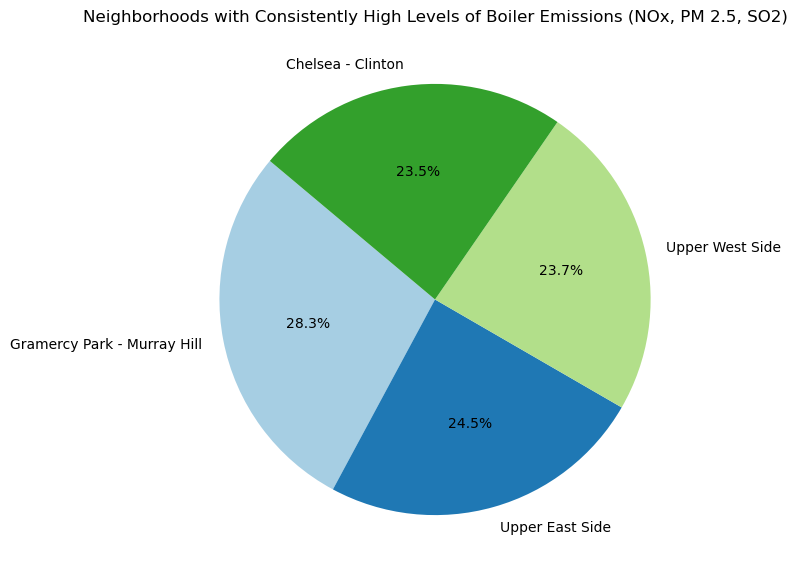

In [8]:
# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Neighborhoods with Consistently High Levels of Boiler Emissions (NOx, PM 2.5, SO2)')

# Display the pie chart
plt.show()


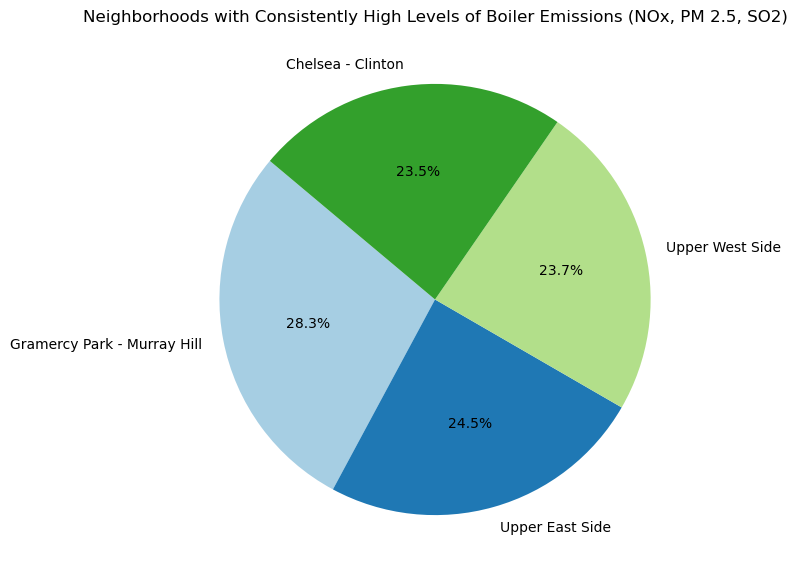

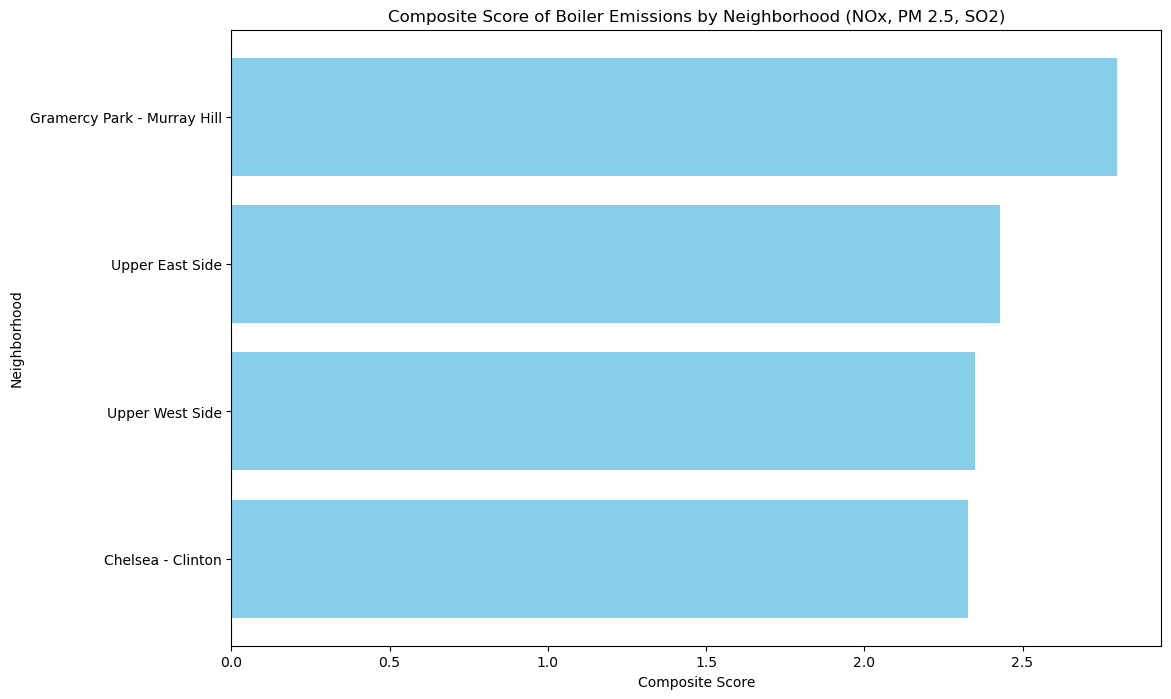

In [9]:
# Filter data for each pollutant
nox_data = data[data['Name'].str.contains('NOx', case=False, na=False)]
pm25_data = data[data['Name'].str.contains('PM 2.5', case=False, na=False)]
so2_data = data[data['Name'].str.contains('SO2', case=False, na=False)]

# Aggregate emissions by neighborhood
nox_summary = nox_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()
pm25_summary = pm25_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()
so2_summary = so2_data.groupby('Geo Place Name')['Data Value'].mean().reset_index()

# Merge all summaries into one DataFrame
emission_summary = nox_summary.merge(pm25_summary, on='Geo Place Name', suffixes=('_NOx', '_PM25'))
emission_summary = emission_summary.merge(so2_summary, on='Geo Place Name')
emission_summary.rename(columns={'Data Value': 'SO2_Emissions'}, inplace=True)

# Normalize the emissions data
scaler = MinMaxScaler()
emission_summary[['NOx_Emissions', 'PM25_Emissions', 'SO2_Emissions']] = scaler.fit_transform(
    emission_summary[['Data Value_NOx', 'Data Value_PM25', 'SO2_Emissions']]
)

# Create a composite score
emission_summary['Composite_Score'] = emission_summary['NOx_Emissions'] + \
                                      emission_summary['PM25_Emissions'] + \
                                      emission_summary['SO2_Emissions']

# Sort neighborhoods by the composite score in descending order
high_emission_neighborhoods = emission_summary.sort_values(by='Composite_Score', ascending=False)

# Identify neighborhoods in the top 10% for emissions
top_neighborhoods = high_emission_neighborhoods.head(int(len(high_emission_neighborhoods) * 0.1))

# Prepare data for pie chart and bar chart
labels = top_neighborhoods['Geo Place Name']
sizes = top_neighborhoods['Composite_Score']

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Neighborhoods with Consistently High Levels of Boiler Emissions (NOx, PM 2.5, SO2)')
plt.show()

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(labels, sizes, color='skyblue')
plt.xlabel('Composite Score')
plt.ylabel('Neighborhood')
plt.title('Composite Score of Boiler Emissions by Neighborhood (NOx, PM 2.5, SO2)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest scores at the top
plt.show()